# Mental Heatlh Kaggle Competition

## Imports and Config

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [8]:
# Some useful paths

data_dir = Path("../data")
models_dir = Path("../models")
notebooks_dir = Path(".")

## Read data

In [29]:
data = pd.read_csv(data_dir / "train.csv")
data_to_predict = pd.read_csv(data_dir / "test.csv")
sample = pd.read_csv(data_dir / "sample_submission.csv")

In [36]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [33]:
data.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [43]:
target = "Depression"
X, y = data.drop(columns=[target]), data[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [62]:
y.isnull().sum()

0

## EDA

In [97]:
visually_relevant = []
data.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

Text(0, 0.5, 'Count')

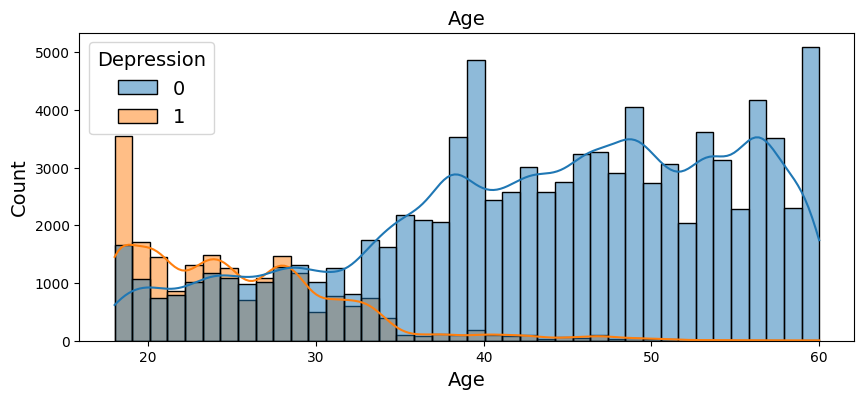

In [115]:
# Take a look at the depression distribution for each feature

fig, ax = plt.subplots(1, 1, figsize=(10, 4))

sns.histplot(data=X_train, x="Age", hue=y_train, multiple ='layer' ,ax=ax, bins=40, kde=True)
ax.set_title("Age")
ax.set_xlabel("Age")
ax.set_ylabel("Count")


Text(0, 0.5, 'Count')

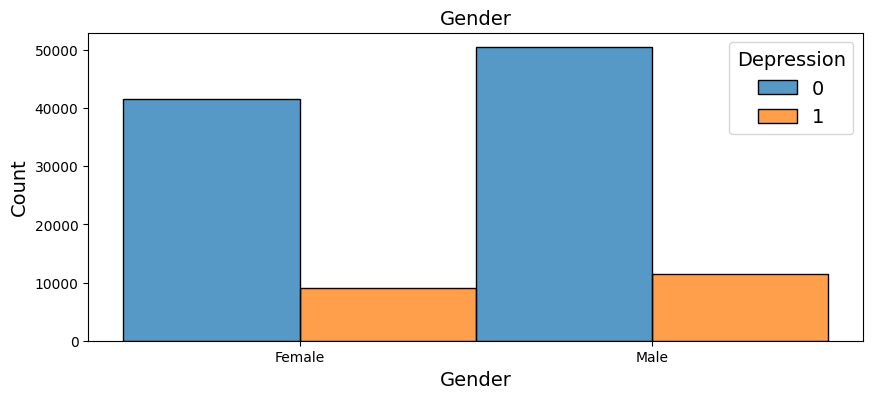

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

sns.histplot(data=X_train, x="Gender", hue=y_train, multiple ='dodge' ,ax=ax)
ax.set_title("Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88],
 [Text(0, 0, 'Kalyan'),
  Text(1, 0, 'Faridabad'),
  Text(2, 0, 'Jaipur'),
  Text(3, 0, 'Nagpur'),
  Text(4, 0, 'Bhopal'),
  Text(5, 0, 'Chennai'),
  Text(6, 0, 'Lucknow'),
  Text(7, 0, 'Ghaziabad'),
  Text(8, 0, 'Kanpur'),
  Text(9, 0, 'Thane'),
  Text(10, 0, 'Mumbai'),
  Text(11, 0, 'Meerut'),
  Text(12, 0, 'Vasai-Virar'),
  Text(13, 0, 'Vadodara'),
  Text(14, 0, 'Patna'),
  Text(15, 0, 'Hyderabad'),
  Text(16, 0, 'Ahmedabad'),
  Text(17, 0, 'Agra'),
  Text(18, 0, 'Var

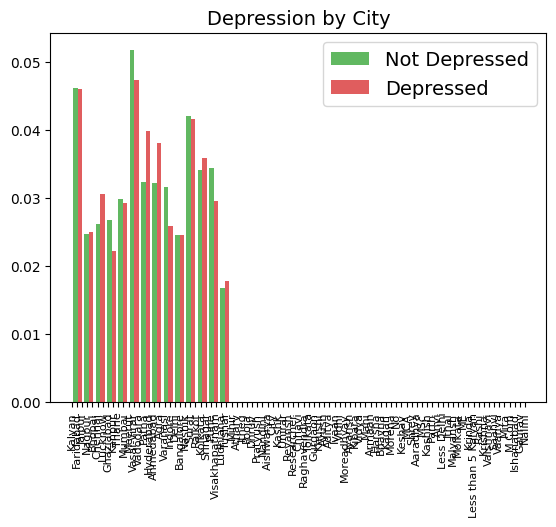

In [84]:
plt.hist(x = [X_train[y_train==0]['City'], X_train[y_train==1]['City']], bins = 40, stacked=False, color = colors, label = ['Not Depressed','Depressed'], density=True, alpha=0.75)
plt.legend()
plt.title('Depression by City')
plt.xticks(rotation=90, fontsize=8)
# Not relevant

Text(0.5, 1.0, 'Depression by Job Satisfaction')

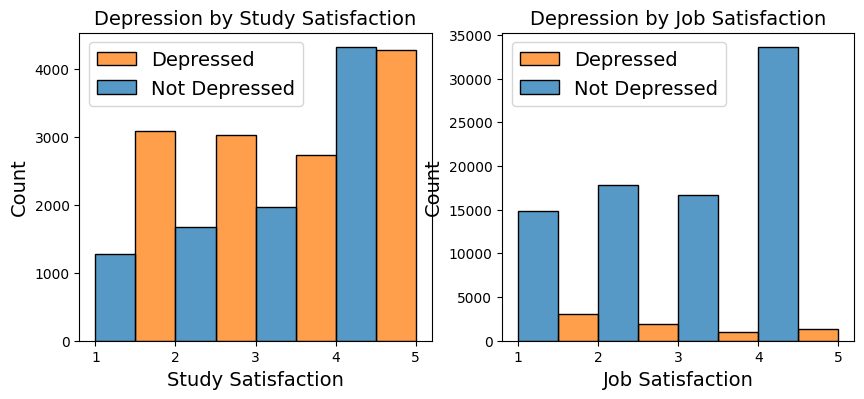

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=X_train, x="Study Satisfaction", hue=y_train, multiple ='dodge' ,ax=axs[0], bins=[1,2,3,4,5], )
axs[0].legend(['Depressed', 'Not Depressed'])
axs[0].set_title('Depression by Study Satisfaction')

sns.histplot(data=X_train, x="Job Satisfaction", hue=y_train, multiple ='dodge' ,ax=axs[1], bins=[1,2,3,4,5], )
axs[1].legend(['Depressed', 'Not Depressed'])
axs[1].set_title('Depression by Job Satisfaction')


## Preprocessing

In [125]:
X_train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

In [ ]:
one_hot_cols = ['Gender', 'Working Professional or Student']
ordinal_cols = ['City', 'Profession']

In [123]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder